# Die vergessenen Pandemien: Was die Schweiz aus ihrer Vergangenheit lernen kann
 
Pandemien wie COVID-19 haben uns gezeigt, wie verletzlich moderne Gesellschaften trotz technologischem Fortschritt sein können. Doch die Geschichte kennt viele solcher Gesundheitskrisen – auch in der Schweiz.  
 
Dieses Projekt visualisiert historische Daten zu Pandemien und Sterblichkeit in der Schweiz, um zu zeigen:
- wie Krankheiten sich über Kantone verbreiteten,
- wie Todesraten sich entwickelten,
- und was wir daraus für zukünftige Krisen lernen können.

In [3]:
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, Legend, Title, Span
from bokeh.palettes import Category10
from bokeh.layouts import column, row
import matplotlib.pyplot as plt
import numpy as np


In [4]:
data_set1 = pd.read_excel("../Data/1_History_Pandemics.xlsx")
data_set2_mortality = pd.read_excel("../Data/2_All_cantons_1953-1958_Mortality.xlsx")
data_set2_incidence_weekly = pd.read_excel("../Data/2_Data_cantons_incidence_weekly_56_58_NEW.xlsx")
data_set2_population = pd.read_excel("../Data/2_Population_cantons.xlsx")
data_set3 = pd.read_excel("../Data/3_Todesursachen Schweiz ohne Alter 1876-2002.xlsx")

## Dataset 1 approx. 3

In [5]:
data_set1.describe()

,Jahr,Todesfälle_Grippe_100000,Todesfälle_Covid_100000,TodesfälleGrippe,TodesfälleCOVID,Population,Überasterblichkeit_Alles,ÜberasterblichkeitPlus,ÜberasterblichkeitMinus
count,143.00000,140.000000,3.000000,140.00000,3.000000,1.430000e+02,141.000000,77.000000,68.000000
mean,1951.00000,18.172899,74.326929,767.00000,6431.666667,5.195008e+06,0.656738,3.740260,-2.873529
std,41.42463,48.962370,31.572219,1883.48357,2685.667391,1.715657e+06,5.842117,6.033792,2.543568
min,1880.00000,0.038532,46.104776,3.00000,4029.000000,2.840501e+06,-13.800000,0.000000,-13.800000
25%,1915.50000,3.034354,57.278424,155.25000,4982.000000,3.855200e+06,-2.100000,0.700000,-4.025000
50%,1951.00000,7.818421,68.452072,422.00000,5935.000000,4.717200e+06,0.300000,2.500000,-2.300000
75%,1986.50000,19.202038,88.438006,839.25000,7633.000000,6.504124e+06,2.800000,4.900000,-0.975000
max,2022.00000,554.049400,108.423939,21491.00000,9331.000000,8.738791e+06,49.300000,49.300000,0.000000


In [6]:
data_set1.head(10)

,Jahr,Todesfälle_Grippe_100000,Todesfälle_Covid_100000,TodesfälleGrippe,TodesfälleCOVID,Population,Überasterblichkeit_Alles,ÜberasterblichkeitPlus,ÜberasterblichkeitMinus
0,1880,3.766941,NaN,107.0,NaN,2840501,NaN,0.0,0.0
1,1881,2.358739,NaN,67.0,NaN,2840501,NaN,0.0,0.0
2,1882,3.191577,NaN,91.0,NaN,2851255,1.0,1.0,NaN
3,1883,2.762012,NaN,79.0,NaN,2860234,-4.6,NaN,-4.6
4,1884,1.880705,NaN,54.0,NaN,2871264,-1.0,NaN,-1.0
5,1885,2.115360,NaN,61.0,NaN,2883670,7.2,7.2,NaN
6,1886,2.109133,NaN,61.0,NaN,2892184,3.2,3.2,NaN
7,1887,1.929966,NaN,56.0,NaN,2901605,-0.8,NaN,-0.8
8,1888,2.610578,NaN,76.0,NaN,2911233,-2.7,NaN,-2.7
9,1889,1.813270,NaN,53.0,NaN,2922897,2.4,2.4,NaN


In [7]:
# Enable Bokeh to display in notebook
output_notebook()

# Filter and prepare the data
pandemic_data = data_set1.copy()

# First, check the exact column names
print("Column names:", pandemic_data.columns.tolist())

# Create a ColumnDataSource for better interactivity
source = ColumnDataSource(pandemic_data)

# Create a figure 
p = figure(
    height=500, 
    width=900,
    x_axis_label='Year',
    y_axis_label='Deaths per 100,000 Population',
    tools="pan,wheel_zoom,box_zoom,reset,save,hover",
    tooltips=[
        ("Year", "@Jahr"),
        ("Influenza Deaths", "@{Todesfälle_Grippe_100000}{0,0.0}"),
        ("COVID Deaths", "@{Todesfälle_Covid_100000}{0,0.0}"),
        ("Population", "@Population{0,0}")
    ]
)

# Plot Influenza deaths
p.line(x='Jahr', y='Todesfälle_Grippe_100000', source=source,
       line_width=3, color=Category10[3][0], alpha=0.8,
       legend_label='Influenza Deaths (per 100,000)')
p.circle(x='Jahr', y='Todesfälle_Grippe_100000', source=source,
         size=8, color=Category10[3][0], alpha=0.8)

# Plot COVID deaths
p.line(x='Jahr', y='Todesfälle_Covid_100000', source=source,
       line_width=3, color=Category10[3][1], alpha=0.8,
       legend_label='COVID-19 Deaths (per 100,000)')
p.circle(x='Jahr', y='Todesfälle_Covid_100000', source=source,
         size=8, color=Category10[3][1], alpha=0.8)

# Style the legend
p.legend.location = "top_right"
p.legend.click_policy = "hide"
p.legend.background_fill_alpha = 0.5

# Customize title
p.title = Title(text="Comparison of Influenza vs COVID-19 Deaths per 100,000 Population", 
               text_font_size='16pt', align='center')

# Add grid lines for better readability
p.grid.grid_line_alpha = 0.3

# Configure hover behavior
hover = p.select(dict(type=HoverTool))
hover.mode = 'vline'  # This creates a vertical line when you hover

# Show the plot
show(p)

Loading BokehJS ...

Column names: ['Jahr', 'Todesfälle_Grippe_100000', 'Todesfälle_Covid_100000', 'TodesfälleGrippe', 'TodesfälleCOVID', 'Population', 'Überasterblichkeit_Alles', 'ÜberasterblichkeitPlus', 'ÜberasterblichkeitMinus']


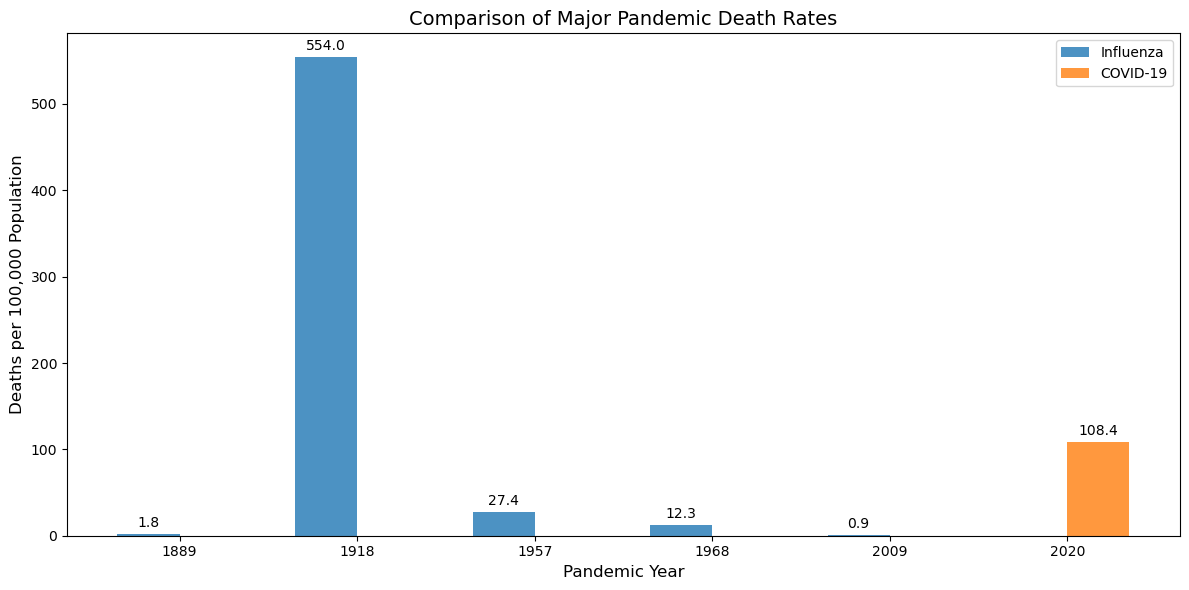

In [8]:
# Compared to the population with influenza and Covid
# Create a figure showing major influenza pandemics alongside COVID
pandemic_years = [1889, 1918, 1957, 1968, 2009, 2020]  # Major pandemic years
pandemic_data = data_set1[data_set1['Jahr'].isin(pandemic_years)].copy()

# Check for NaN values and replace them with 0 for visualization purposes
pandemic_data['Todesfälle_Grippe_100000'] = pandemic_data['Todesfälle_Grippe_100000'].fillna(0)
pandemic_data['Todesfälle_Covid_100000'] = pandemic_data['Todesfälle_Covid_100000'].fillna(0)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Set width of bars
bar_width = 0.35
index = np.arange(len(pandemic_years))

# Create the bars
influenza_bars = ax.bar(index - bar_width/2, pandemic_data['Todesfälle_Grippe_100000'], 
                        bar_width, label='Influenza', color='#1f77b4', alpha=0.8)
covid_bars = ax.bar(index + bar_width/2, pandemic_data['Todesfälle_Covid_100000'], 
                   bar_width, label='COVID-19', color='#ff7f0e', alpha=0.8)

# Add labels, title and legend
ax.set_xlabel('Pandemic Year', fontsize=12)
ax.set_ylabel('Deaths per 100,000 Population', fontsize=12)
ax.set_title('Comparison of Major Pandemic Death Rates', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(pandemic_years)
ax.legend()

# Add pandemic names as annotations
pandemic_names = ["Russian Flu", "Spanish Flu", "Asian Flu", "Hong Kong Flu", "Swine Flu", "COVID-19"]
for i, name in enumerate(pandemic_names):
    ax.annotate(name, xy=(i, -20), xytext=(0, 0), 
                textcoords="offset points", ha='center', va='top', 
                rotation=45, fontsize=10)

# Add value labels on top of bars
for bar in influenza_bars:
    height = bar.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
        
for bar in covid_bars:
    height = bar.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

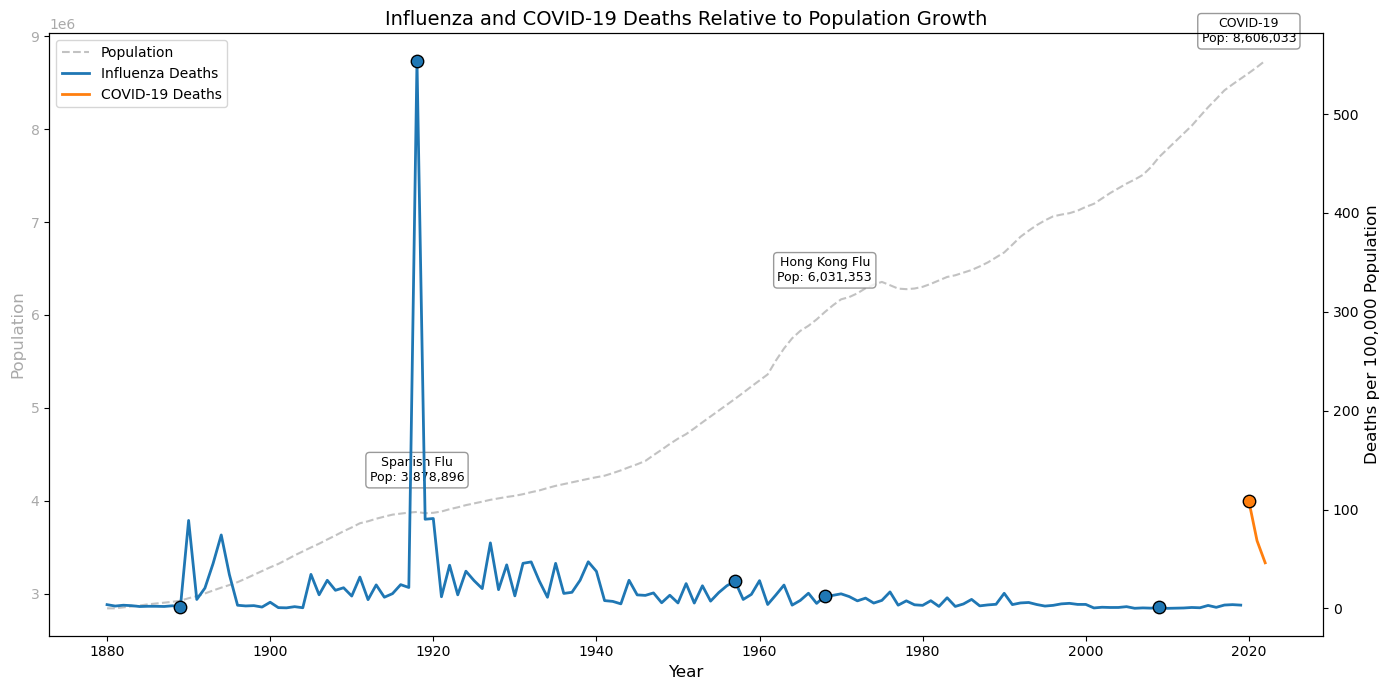

In [9]:
# Compared to the population with influenza and Covid
# Create a figure for population comparison


# Create a figure for comparing deaths with population
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot population on the primary y-axis
color = 'darkgray'
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Population', fontsize=12, color=color)
ax1.plot(data_set1['Jahr'], data_set1['Population'], color=color, linestyle='--', alpha=0.7, label='Population')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)

# Create a secondary y-axis for death rates
ax2 = ax1.twinx()
ax2.set_ylabel('Deaths per 100,000 Population', fontsize=12)
ax2.plot(data_set1['Jahr'], data_set1['Todesfälle_Grippe_100000'], color='#1f77b4', linewidth=2, 
         label='Influenza Deaths')
ax2.plot(data_set1['Jahr'], data_set1['Todesfälle_Covid_100000'], color='#ff7f0e', linewidth=2,
         label='COVID-19 Deaths')

# Highlight specific pandemic years
pandemic_years = [1889, 1918, 1957, 1968, 2009, 2020]
pandemic_names = ["Russian Flu", "Spanish Flu", "Asian Flu", "Hong Kong Flu", "Swine Flu", "COVID-19"]

for year, name in zip(pandemic_years, pandemic_names):
    if year in data_set1['Jahr'].values:
        # Get corresponding population and death rates
        year_data = data_set1[data_set1['Jahr'] == year]
        population = year_data['Population'].values[0]
        flu_rate = year_data['Todesfälle_Grippe_100000'].values[0]
        covid_rate = year_data['Todesfälle_Covid_100000'].values[0]
        
        # Add annotations
        if not pd.isna(flu_rate) and flu_rate > 0:
            ax2.scatter(year, flu_rate, color='#1f77b4', s=80, zorder=5, edgecolor='black')
        if not pd.isna(covid_rate) and covid_rate > 0:
            ax2.scatter(year, covid_rate, color='#ff7f0e', s=80, zorder=5, edgecolor='black')
        
        # Add a text annotation about the population
        if year in [1918, 1968, 2020]:  # Choose a few key years to avoid crowding
            ax1.annotate(f"{name}\nPop: {population:,.0f}", 
                        xy=(year, population), xytext=(0, 20),
                        textcoords="offset points", ha='center', va='bottom',
                        fontsize=9, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Add legend with combined entries from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Add title
plt.title('Influenza and COVID-19 Deaths Relative to Population Growth', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\nicol\AppData\Local\Temp\ipykernel_29388\1464686064.py:19: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  population_line = ax1.plot(pandemic_data['Jahr'], pandemic_data['Population'],


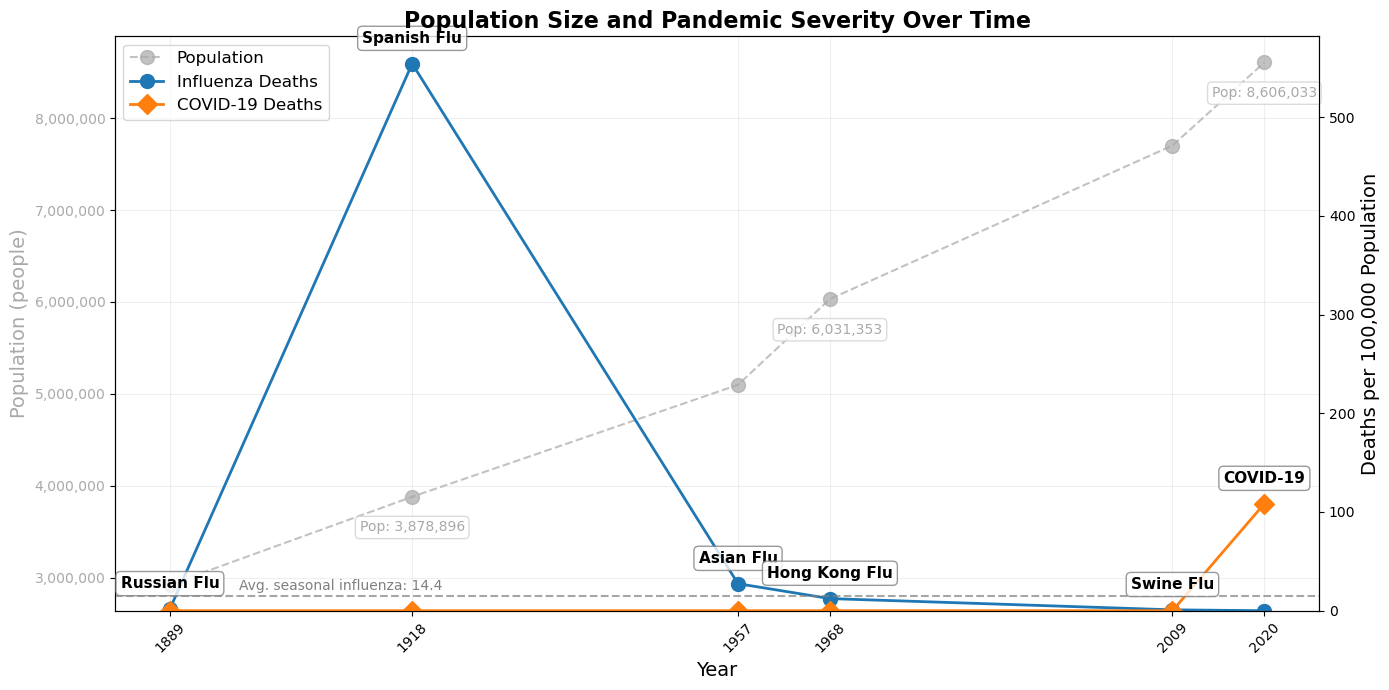

In [10]:
# Create a scatter plot that relates population size to death rates over time
pandemic_years = [1889, 1918, 1957, 1968, 2009, 2020]
pandemic_data = data_set1[data_set1['Jahr'].isin(pandemic_years)].copy()

# Replace NaN values with zeros for plotting
pandemic_data['Todesfälle_Grippe_100000'] = pandemic_data['Todesfälle_Grippe_100000'].fillna(0)
pandemic_data['Todesfälle_Covid_100000'] = pandemic_data['Todesfälle_Covid_100000'].fillna(0)

# Create the scatter plot with dual y-axes for population and mortality
fig, ax1 = plt.subplots(figsize=(14, 7))

# Sort the data by year for proper chronological display
pandemic_data = pandemic_data.sort_values('Jahr')

# Primary axis: Population over time
color = 'darkgray'
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Population (people)', fontsize=14, color=color)
population_line = ax1.plot(pandemic_data['Jahr'], pandemic_data['Population'], 
                           'o-', color=color, markersize=10, linestyle='--', 
                           alpha=0.7, label='Population')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(alpha=0.2)

# Format population y-axis with commas for better readability
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{x:,.0f}"))

# Set x-ticks to be exactly at the pandemic years
ax1.set_xticks(pandemic_data['Jahr'])
ax1.set_xticklabels(pandemic_data['Jahr'], rotation=45)

# Secondary axis: Death rates
ax2 = ax1.twinx()
ax2.set_ylabel('Deaths per 100,000 Population', fontsize=14)

# Plot influenza death rates
influenza_line = ax2.plot(pandemic_data['Jahr'], pandemic_data['Todesfälle_Grippe_100000'], 
                          'o-', color='#1f77b4', markersize=10, linewidth=2, 
                          label='Influenza Deaths')

# Plot COVID death rates
covid_line = ax2.plot(pandemic_data['Jahr'], pandemic_data['Todesfälle_Covid_100000'], 
                      'D-', color='#ff7f0e', markersize=10, linewidth=2,
                      label='COVID-19 Deaths')

# Add annotations for pandemic names
for i, row in pandemic_data.iterrows():
    year = row['Jahr']
    pandemic_index = pandemic_years.index(year)
    pandemic_name = pandemic_names[pandemic_index]
    
    # Add the pandemic name above the points
    ax2.annotate(f"{pandemic_name}", 
                xy=(year, max(row['Todesfälle_Grippe_100000'], row['Todesfälle_Covid_100000'])),
                xytext=(0, 15), textcoords='offset points',
                ha='center', fontsize=11, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    # Add population annotation below the population line
    if year in [1918, 1968, 2020]:  # Limit annotations to avoid crowding
        ax1.annotate(f"Pop: {row['Population']:,.0f}", 
                    xy=(year, row['Population']),
                    xytext=(0, -25), textcoords='offset points',
                    ha='center', fontsize=10, color='darkgray',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="lightgray", alpha=0.8))

# Add legend with all entries
lines = population_line + influenza_line + covid_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=12)

# Add title
plt.title('Population Size and Pandemic Severity Over Time', fontsize=16, fontweight='bold')

# Add horizontal reference line for avg seasonal influenza (if available)
try:
    normal_years = data_set1[~data_set1['Jahr'].isin([1889, 1918, 1957, 1968, 2009])]
    avg_influenza = normal_years['Todesfälle_Grippe_100000'].mean()
    ax2.axhline(y=avg_influenza, color='gray', linestyle='--', alpha=0.7)
    # Hier ist die Änderung: xytext=(50, 5) statt (10, 5)
    ax2.annotate(f'Avg. seasonal influenza: {avg_influenza:.1f}', 
                xy=(pandemic_data['Jahr'].min(), avg_influenza),
                xytext=(50, 5), textcoords='offset points',
                fontsize=10, color='gray')
except:
    pass  # Skip if calculation fails

# Ensure y-axis starts at 0 for death rates
ax2.set_ylim(bottom=0)

# Create hover annotations
annot = ax2.annotate("", xy=(0,0), xytext=(20,20), textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.8),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

# Define function to update annotation for hover
def update_annot(ind, line, is_flu=True):
    x,y = line.get_data()
    annot.xy = (x[ind["ind"][0]], y[ind["ind"][0]])
    year = int(x[ind["ind"][0]])
    deaths = y[ind["ind"][0]]
    pop = pandemic_data[pandemic_data['Jahr'] == year]['Population'].values[0]
    
    if is_flu:
        text = f"Year: {year}\nInfluenza deaths: {deaths:.1f} per 100k\nPopulation: {pop:,.0f}"
    else:
        text = f"Year: {year}\nCOVID deaths: {deaths:.1f} per 100k\nPopulation: {pop:,.0f}"
    
    annot.set_text(text)
    annot.set_visible(True)

# Define function to handle hover event
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax2:
        # Check influenza line
        cont, ind = influenza_line[0].contains(event)
        if cont:
            update_annot(ind, influenza_line[0], is_flu=True)
            fig.canvas.draw_idle()
            return
        
        # Check COVID line
        cont, ind = covid_line[0].contains(event)
        if cont:
            update_annot(ind, covid_line[0], is_flu=False)
            fig.canvas.draw_idle()
            return
        
        # Check population line
        cont, ind = population_line[0].contains(event)
        if cont:
            x,y = population_line[0].get_data()
            year = int(x[ind["ind"][0]])
            pop = y[ind["ind"][0]]
            annot.xy = (year, pop)
            annot.set_text(f"Year: {year}\nPopulation: {pop:,.0f}")
            annot.set_visible(True)
            fig.canvas.draw_idle()
            return
            
    if vis:
        annot.set_visible(False)
        fig.canvas.draw_idle()

# Connect the hover event to the figure
fig.canvas.mpl_connect("motion_notify_event", hover)

# Adjust layout
plt.tight_layout()
plt.show()

In [11]:
# Enable Bokeh to display in notebook
output_notebook()

# Create a figure for comparing deaths with population
from bokeh.models import Range1d, LinearAxis, HoverTool, Span, Label, ColumnDataSource, NumeralTickFormatter

# Create data source for better interactivity
source = ColumnDataSource(data_set1)

# Berechne den maximalen Todesfall-Wert für die Y-Achsenskalierung
max_death_value = max(
    data_set1['Todesfälle_Grippe_100000'].max(),
    data_set1['Todesfälle_Covid_100000'].max()
)
# Füge etwas Puffer hinzu (20%)
max_death_value = max_death_value * 1.2

# Create figure with dual y-axes
p = figure(
    height=500, 
    width=900,
    x_axis_label='Year',
    y_axis_label='Deaths per 100,000 Population',
    tools="pan,wheel_zoom,box_zoom,reset,save",
    title="Influenza and COVID-19 Deaths Relative to Population Growth"
)

# Setze explizite Y-Achsengrenzen für die Death-Rate
p.y_range = Range1d(start=0, end=max_death_value)

# Add secondary y-axis for population
p.extra_y_ranges = {"population": Range1d(start=0, end=data_set1['Population'].max() * 1.1)}
p.add_layout(LinearAxis(y_range_name="population", axis_label="Population (people)"), 'right')

# Formatiere die Zahlen an der Population Y-Achse mit Kommas
population_axis = p.right[0]
population_axis.formatter = NumeralTickFormatter(format="0,0")

# Plot population on secondary y-axis
population_line = p.line('Jahr', 'Population', source=source, y_range_name="population",
                        line_width=2, color='darkgray', alpha=0.7, line_dash='dashed',
                        legend_label='Population')

# Plot death rates on primary axis
influenza_line = p.line('Jahr', 'Todesfälle_Grippe_100000', source=source,
                       line_width=2, color=Category10[3][0], alpha=0.8,
                       legend_label='Influenza Deaths')

covid_line = p.line('Jahr', 'Todesfälle_Covid_100000', source=source,
                   line_width=2, color=Category10[3][1], alpha=0.8,
                   legend_label='COVID-19 Deaths')

# Definiere alle Pandemie-Jahre
pandemic_years = [1889, 1918, 1957, 1968, 2009, 2020]
pandemic_names = ["Russian Flu", "Spanish Flu", "Asian Flu", "Hong Kong Flu", "Swine Flu", "COVID-19"]

# Erstelle eine Liste aller Jahre, die wir hervorheben wollen (alle ~15 Jahre + Pandemie Jahre)
all_years = sorted(list(set(pandemic_years + list(range(1889, 2021, 15)))))

# Create a special dataset just for the highlighted years with tooltip info
highlight_data = data_set1[data_set1['Jahr'].isin(all_years)].copy()
highlight_data['Todesfälle_Grippe_100000'] = highlight_data['Todesfälle_Grippe_100000'].fillna(0)
highlight_data['Todesfälle_Covid_100000'] = highlight_data['Todesfälle_Covid_100000'].fillna(0)

# Add pandemic names to data for tooltips (nur für tatsächliche Pandemie-Jahre)
highlight_data['Pandemic_Name'] = ""
highlight_data['Population_Formatted'] = highlight_data['Population'].apply(lambda x: f"{x:,.0f}")
highlight_data['Is_Pandemic'] = False

# Füge die Pandemienamen nur für tatsächliche Pandemiejahre hinzu
for year, name in zip(pandemic_years, pandemic_names):
    if year in highlight_data['Jahr'].values:
        highlight_data.loc[highlight_data['Jahr'] == year, 'Pandemic_Name'] = name
        highlight_data.loc[highlight_data['Jahr'] == year, 'Is_Pandemic'] = True

# Create new ColumnDataSource with highlight data
highlight_source = ColumnDataSource(highlight_data)

# Add highlighted points for regular years (smaller circles)
regular_influenza = p.circle('Jahr', 'Todesfälle_Grippe_100000', 
                             source=highlight_source,
                             size=6, color=Category10[3][0], alpha=0.6)

regular_covid = p.circle('Jahr', 'Todesfälle_Covid_100000', 
                        source=highlight_source,
                        size=6, color=Category10[3][1], alpha=0.6)

regular_population = p.circle('Jahr', 'Population', 
                             source=highlight_source, 
                             y_range_name="population",
                             size=6, color='darkgray', alpha=0.6)

# Create a special dataset just for the pandemic years (to add special styling)
pandemic_data = highlight_data[highlight_data['Is_Pandemic'] == True].copy()
pandemic_source = ColumnDataSource(pandemic_data)

# Add larger highlighted points for pandemic years
pandemic_influenza = p.circle('Jahr', 'Todesfälle_Grippe_100000', 
                             source=pandemic_source,
                             size=10, color=Category10[3][0], alpha=0.8, 
                             line_width=2, line_color='black')

pandemic_covid = p.circle('Jahr', 'Todesfälle_Covid_100000', 
                         source=pandemic_source,
                         size=10, color=Category10[3][1], alpha=0.8,
                         line_width=2, line_color='black')

pandemic_population = p.circle('Jahr', 'Population', 
                              source=pandemic_source, 
                              y_range_name="population",
                              size=10, color='darkgray', alpha=0.8,
                              line_width=2, line_color='black')

# Add hover tooltips for all regular points
hover_regular = HoverTool(renderers=[regular_influenza, regular_covid, regular_population], tooltips=[
    ("Year", "@Jahr"),
    ("Influenza Deaths", "@{Todesfälle_Grippe_100000}{0,0.0} per 100,000"),
    ("COVID-19 Deaths", "@{Todesfälle_Covid_100000}{0,0.0} per 100,000"),
    ("Population", "@Population_Formatted people")
])

# Add hover tooltips for pandemic influenza points
hover_pandemic_influenza = HoverTool(renderers=[pandemic_influenza], tooltips=[
    ("Year", "@Jahr"),
    ("Pandemic", "@Pandemic_Name"),
    ("Influenza Deaths", "@{Todesfälle_Grippe_100000}{0,0.0} per 100,000"),
    ("Population", "@Population_Formatted people"),
])

# Add hover tooltips for pandemic COVID points
hover_pandemic_covid = HoverTool(renderers=[pandemic_covid], tooltips=[
    ("Year", "@Jahr"),
    ("Pandemic", "@Pandemic_Name"),
    ("COVID-19 Deaths", "@{Todesfälle_Covid_100000}{0,0.0} per 100,000"),
    ("Population", "@Population_Formatted people"),
])

# Add hover tooltips for pandemic population points
hover_pandemic_population = HoverTool(renderers=[pandemic_population], tooltips=[
    ("Year", "@Jahr"),
    ("Pandemic", "@Pandemic_Name"),
    ("Population", "@Population_Formatted people"),
])

# Add annotation labels for key pandemic years
for year in [1918, 1968, 2020]:
    if year in pandemic_data['Jahr'].values:
        pandemic_year_data = pandemic_data[pandemic_data['Jahr'] == year]
        name = pandemic_year_data['Pandemic_Name'].values[0]
        population = pandemic_year_data['Population'].values[0]
        
        label = Label(
            x=year, 
            y=population,
            x_offset=0, 
            y_offset=20,
            text=f"{name}\nPop: {population:,.0f}",
            text_align='center',
            text_font_size='9pt',
            text_color='black',
            background_fill_color='white',
            background_fill_alpha=0.8,
            border_line_color='gray',
            border_line_alpha=0.8
        )
        p.add_layout(label)

# Add all hover tools to plot
p.add_tools(hover_regular)
p.add_tools(hover_pandemic_influenza)
p.add_tools(hover_pandemic_covid)
p.add_tools(hover_pandemic_population)

# Style the plot
p.title.text_font_size = '14pt'
p.title.align = 'center'
p.legend.location = "top_left"
p.legend.click_policy = "hide"
p.legend.background_fill_alpha = 0.5
p.grid.grid_line_alpha = 0.3

# Set y-axis limits
p.y_range.start = 0
p.extra_y_ranges['population'].start = 0

# Show the plot
show(p)

Loading BokehJS ...

In [12]:
# Excess mortality

## Dataset 2 approx 7

In [25]:
# Population of the individual cantons and Switzerland as a whole
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.palettes import Category20_20
from bokeh.models import HoverTool

# Bokeh im Notebook aktivieren
output_notebook()

# Daten einlesen
population_df = pd.read_excel("../Data/2_Population_cantons.xlsx")

# Erste Spalte korrekt als "Year" benennen
population_df.rename(columns={population_df.columns[0]: "Year"}, inplace=True)

# Zahlen bereinigen und in float umwandeln (z. B. '1’000’000' → 1000000.0)
for col in population_df.columns[1:]:
    population_df[col] = (
        population_df[col]
        .astype(str)
        .str.replace("'", "")
        .str.replace(",", "")
        .astype(float)
    )

# Daten ins Long-Format bringen
df_long = population_df.melt(id_vars="Year", var_name="Canton", value_name="Population")

# Farbpalette für max. 20 Farben
palette = Category20_20

# Hauptplot vorbereiten
p = figure(title="Bevölkerungsentwicklung der Schweizer Kantone (1950–1970)",
           x_axis_label="Jahr", y_axis_label="Einwohnerzahl",
           width=950, height=550, tools="pan,wheel_zoom,box_zoom,reset,hover,save")

# 🗂 Kantone alphabetisch sortieren
cantons = sorted(df_long["Canton"].unique())

# Linien für alle Kantone zeichnen
for i, canton in enumerate(cantons):
    df_k = df_long[df_long["Canton"] == canton]
    p.line(x=df_k["Year"], y=df_k["Population"], 
           line_width=2, legend_label=canton,
           color=palette[i % len(palette)])  # Wiederholt Palette bei >20 Kantonen

# 🖱 Hover aktivieren
hover = p.select_one(HoverTool)
hover.tooltips = [("Kanton", "@legend_label"), ("Jahr", "$x"), ("Einwohner", "$y{0,0}")]

# Interaktive Legende
p.legend.location = "right"
p.legend.click_policy = "hide"

# Plot anzeigen
show(p)



Loading BokehJS ...

In [15]:
# Influenza waves monthly and weekly (per canton and Switzerland)

In [16]:
# Comparison of influenza deaths and general deaths (per canton and Switzerland)

In [17]:
# Visualise 1957 and 1958 (weekly cases and monthly deaths)

## Dataset 3

In [18]:
# Causes of death infectious diseases, respiratory or-gans, neoplasms, nervous system and circulatory organs, blood metabolism, digestive organs, haemato-poietic system, violent death etc. by year

In [19]:
# Take a closer look at infectious diseases (subgroups) over the years

In [20]:
# Possibly also take a closer look at the other sub-groups over the years